# **Import Libraries and modules**

In [0]:
# https://keras.io/
#!pip install -q keras
#import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


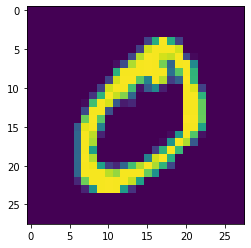

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

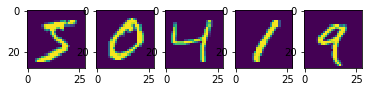

In [0]:
# look for few more images to get the idea of number of pixels network must see to get the gradient/edges extractions
# as per image observation, minimum of 18~20 GRF to be planned to capture the comple object in the image
num_images = 5
for index,image in enumerate(X_train[:num_images]):
  plt.subplot(2,num_images,index+1)
  plt.imshow(X_train[index])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation

model = Sequential(name="model_mnist_code9")

# Block-1 : 
model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(28,28,1), use_bias = False, name="blk1_ly1_conv")) #26X26X8
model.add(BatchNormalization(name="blk1_ly1_batchnorm"))
model.add(Dropout(0.1, name="blk1_ly1_dropout"))

model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False, name="blk1_ly2_conv")) #24X24X16
model.add(BatchNormalization(name="blk1_ly2_batchnorm"))
model.add(Dropout(0.1, name="blk1_ly2_dropout"))

model.add(Convolution2D(8, (1, 1), activation='relu', use_bias = False, name="blk1_combine")) #24X24X8
model.add(MaxPooling2D(pool_size=(2, 2), name="blk1_maxpool")) #12X12X8

# Block-2 : 
model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False, name="blk2_ly1_conv")) #10X10X16
model.add(BatchNormalization(name="blk2_ly1_batchnorm"))
model.add(Dropout(0.1, name="blk2_ly1_dropout"))

model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False, name="blk2_ly2_conv")) #8X8X16
model.add(BatchNormalization(name="blk2_ly2_batchnorm"))
model.add(Dropout(0.1, name="blk2_ly2_dropout"))

model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False, name="blk2_ly3_conv")) #6X6X16
model.add(BatchNormalization(name="blk2_ly3_batchnorm"))
model.add(Dropout(0.1, name="blk2_ly3_dropout"))

model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False, name="blk2_ly4_conv")) #4X4X16
model.add(BatchNormalization(name="blk2_ly4_batchnorm"))
model.add(Dropout(0.1, name="blk2_ly4_dropout"))

# just to get 10 channels as we have 10 classes at output
model.add(Convolution2D(10, (4, 4), use_bias = False, name="blk2_ly5_conv")) #1X1X10

model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name="output"))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.summary()

Model: "model_mnist_code9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
blk1_ly1_conv (Conv2D)       (None, 26, 26, 8)         72        
_________________________________________________________________
blk1_ly1_batchnorm (BatchNor (None, 26, 26, 8)         32        
_________________________________________________________________
blk1_ly1_dropout (Dropout)   (None, 26, 26, 8)         0         
_________________________________________________________________
blk1_ly2_conv (Conv2D)       (None, 24, 24, 16)        1152      
_________________________________________________________________
blk1_ly2_batchnorm (BatchNor (None, 24, 24, 16)        64        
_________________________________________________________________
blk1_ly2_dropout (Dropout)   (None, 24, 24, 16)        0         
_________________________________________________________________
blk1_combine (Conv2D)        (None, 24, 24, 8)   

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])



In [0]:
model.fit(X_train, 
          Y_train, 
          batch_size=128, 
          epochs=20, 
          verbose=1, 
          validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 206us/step - loss: 0.2319 - acc: 0.9266 - val_loss: 0.0595 - val_acc: 0.9803
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 9s 146us/step - loss: 0.0705 - acc: 0.9778 - val_loss: 0.0429 - val_acc: 0.9858
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 9s 147us/step - loss: 0.0521 - acc: 0.9833 - val_loss: 0.0330 - val_acc: 0.9888
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 9s 148us/step - loss: 0.0448 - acc: 0.9857 - val_loss: 0.0291 - val_acc: 0.9900
Epoch 5/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.017225117182139364, 0.9954]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'blk1_ly1_conv'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 16:
        plot_x, plot_y = 4, 4
    else:
        plot_x, plot_y = 4, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


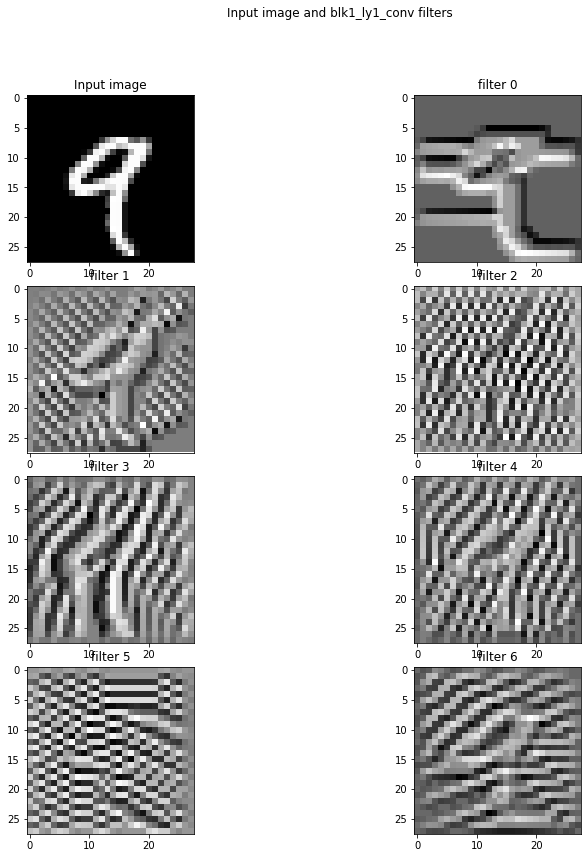

In [0]:
vis_img_in_filter(layer_name = 'blk1_ly1_conv')

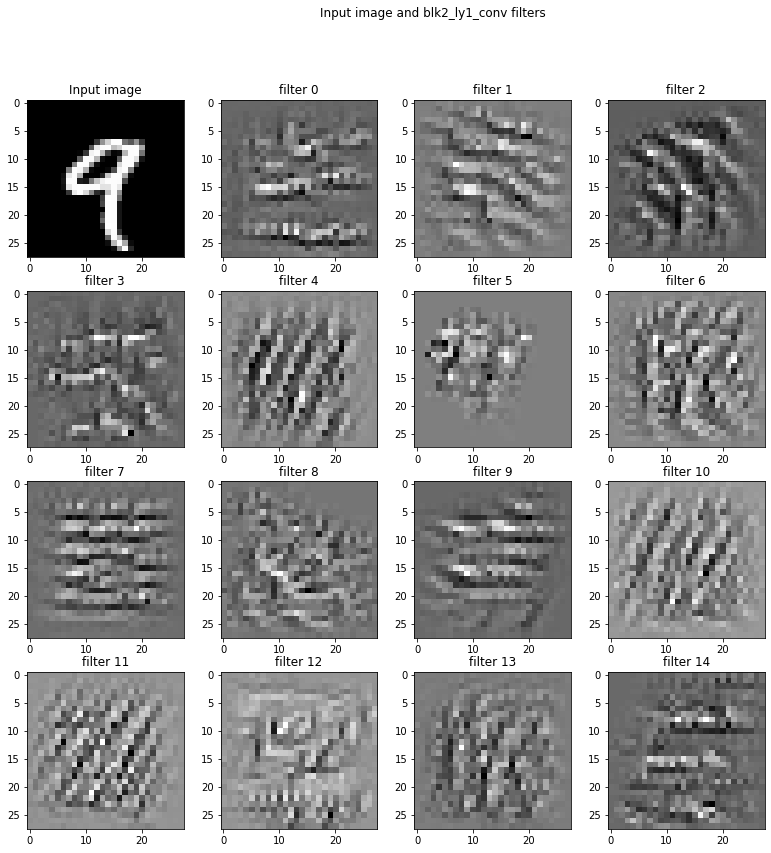

In [0]:
vis_img_in_filter(layer_name = 'blk2_ly1_conv')

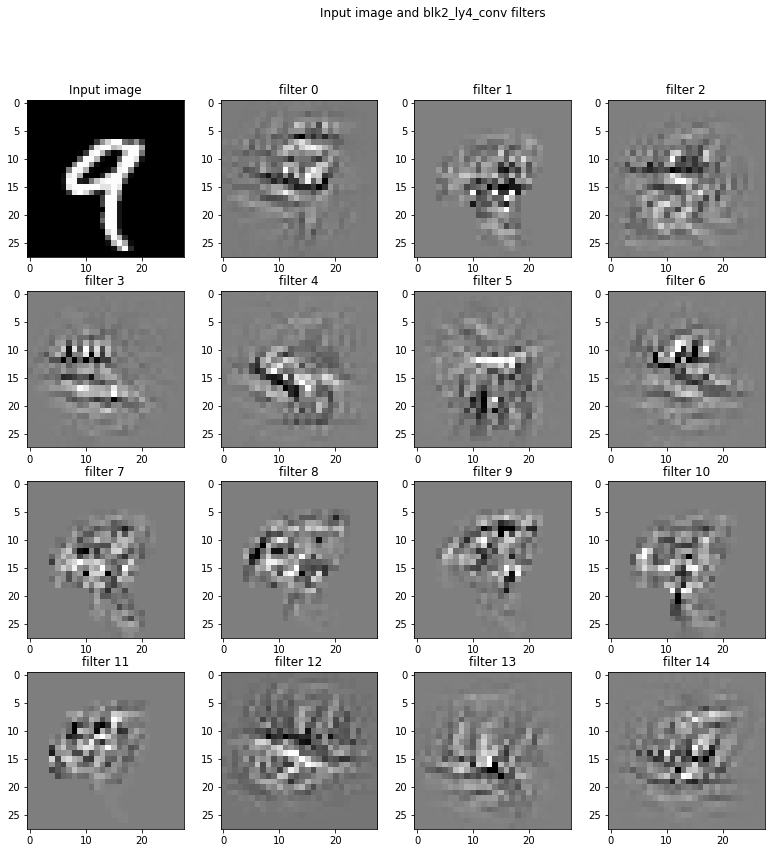

In [0]:
vis_img_in_filter(layer_name = 'blk2_ly4_conv')